Category
disambiguation_qa           100
Math                        100
Challenging Math            100
date_understanding           99
jurisprudence                99
professional_law             99
elementary_mathematics       99
college_biology              98
international_law            98
high_school_statistics       97
college_physics              96
electrical_engineering       96
business_ethics              96
philosophy                   96
college_computer_science     96
abstract_algebra             95
college_medicine             94
professional_accounting      91
college_chemistry            83
college_mathematics          81
formal_logic                 78
Name: count, dtype: int64


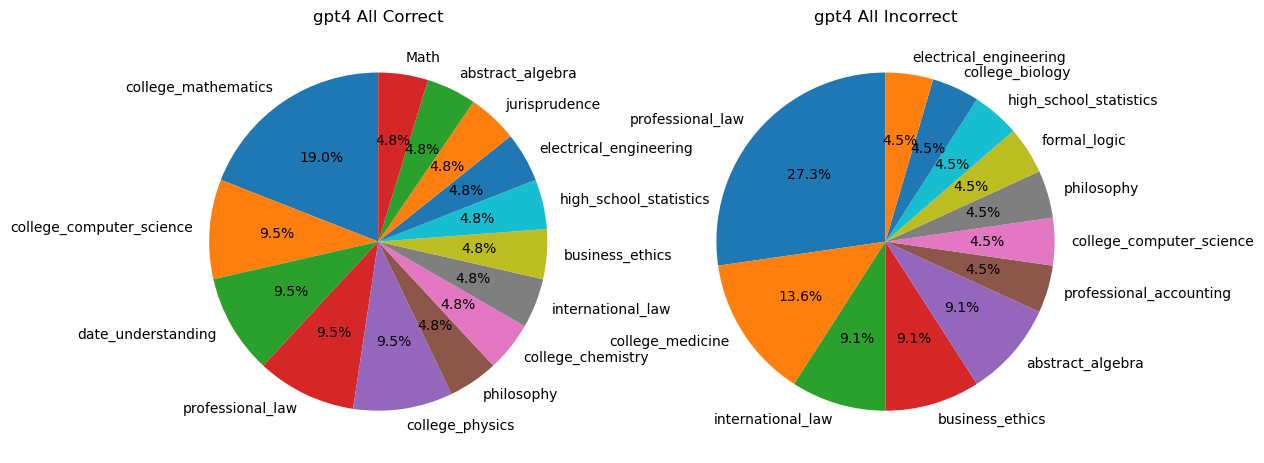

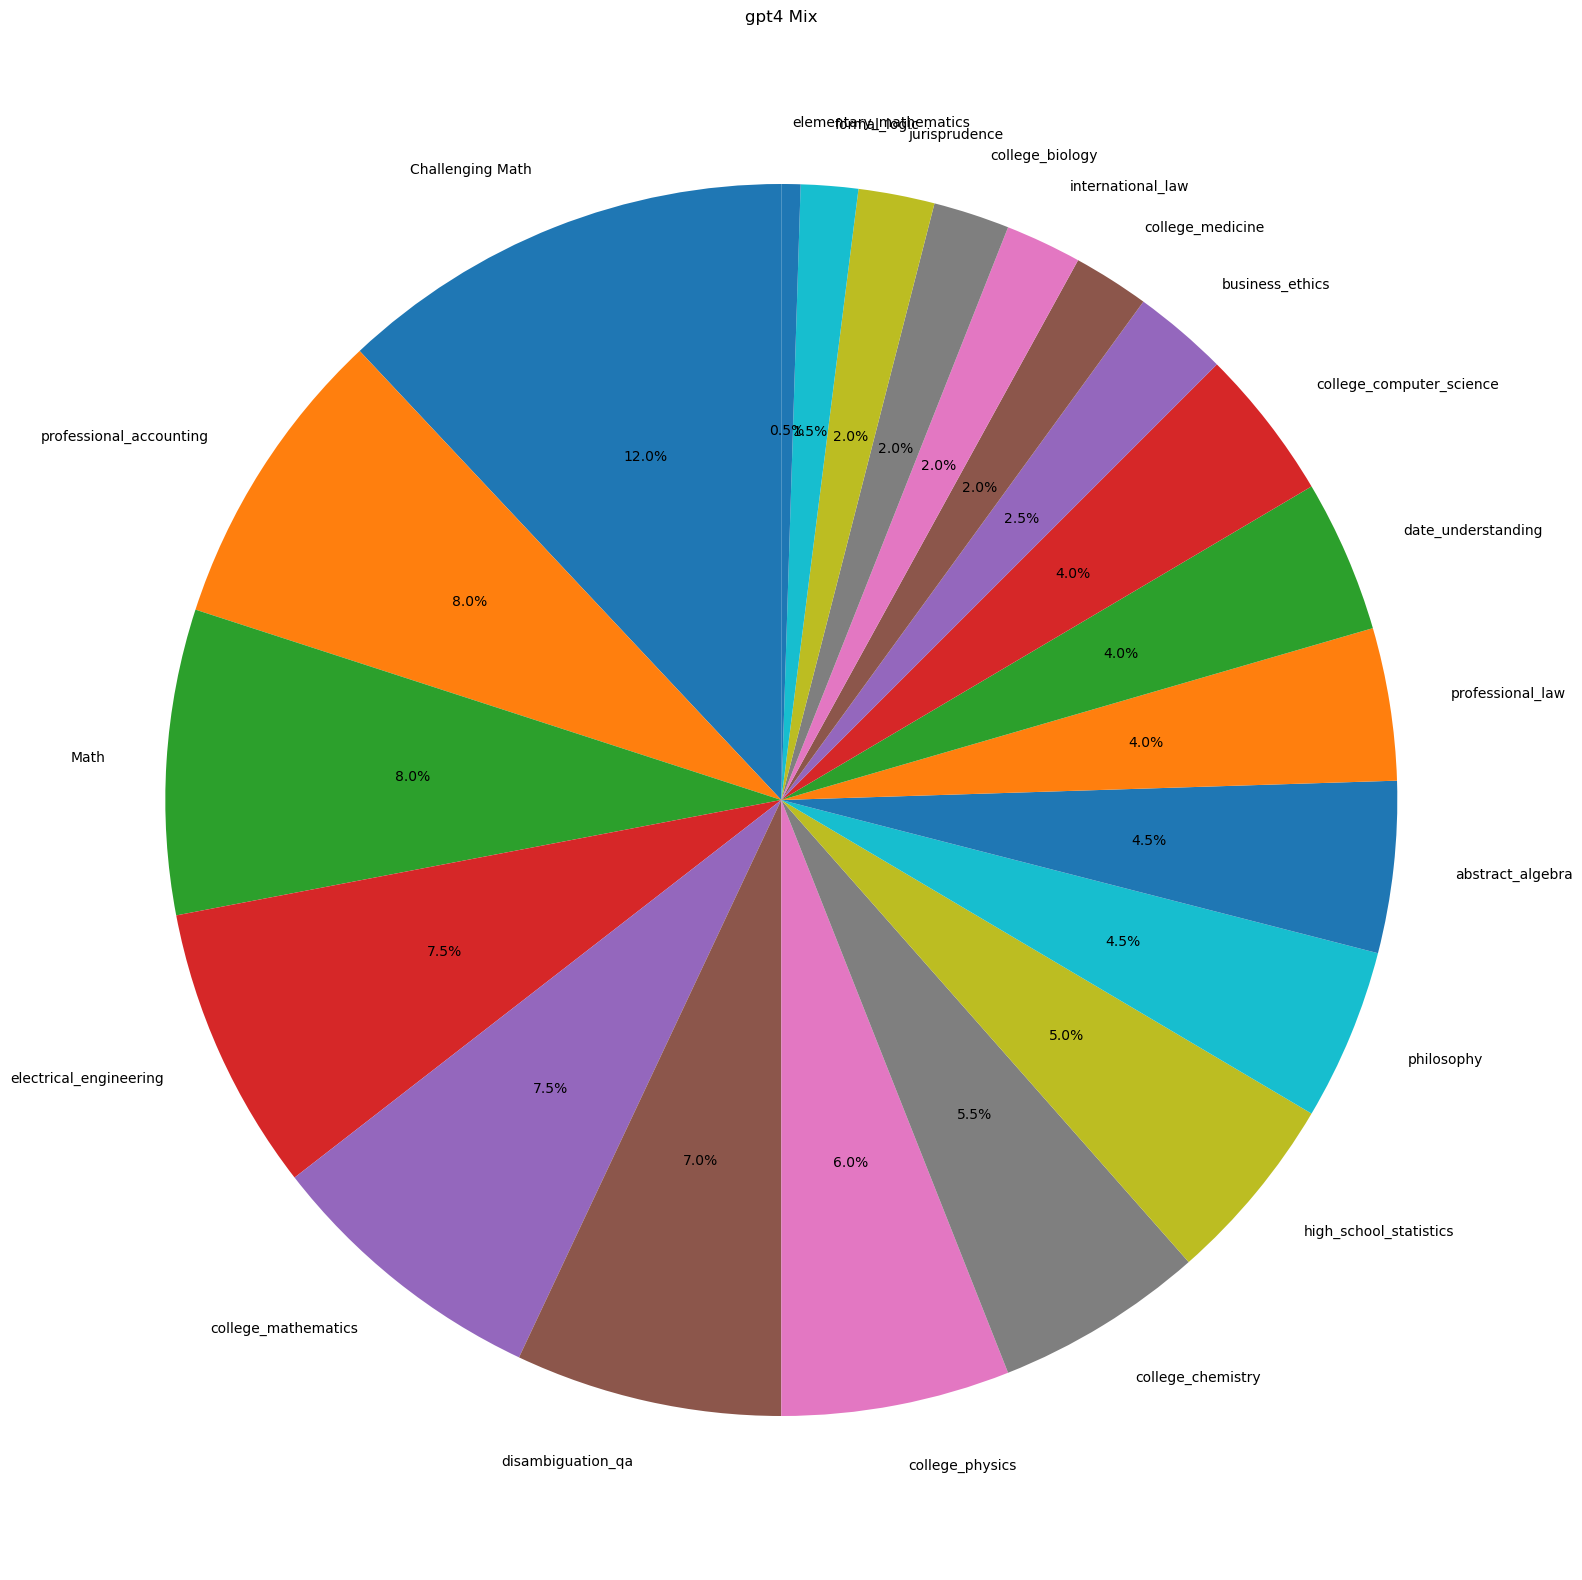

In [50]:
# Sample 100 rows from each of the imbalanced categories
def sample_n(df,n):
    sampled_df = df[df['Category'].isin(['Math', 'Challenging Math', 'disambiguation_qa'])].groupby('Category').apply(lambda x: x.sample(n=n, random_state=1)).reset_index(drop=True)

    # Store the sampled data back into the dataframe
    df = pd.concat([df[~df['Category'].isin(['Math', 'Challenging Math', 'disambiguation_qa'])], sampled_df])
    return df

import pandas as pd
df = pd.read_csv('../result/gpt4_results.csv')
df = sample_n(df, 100)
print(df['Category'].value_counts())
def process_and_plot(df, output_prefix):
    import os
    import json
    import matplotlib.pyplot as plt

    def modify_float(num):
        try:
            return str(round(float(num), 1))
        except:
            return num

    all_correct_df = pd.DataFrame(columns=df.columns)
    all_incorrect_df = pd.DataFrame(columns=df.columns)
    mix_df = pd.DataFrame(columns=df.columns)

    for row_index in range(len(df)):
        row = df.iloc[row_index]
        if pd.isnull(row['raw_cot']):
            continue
        correct_ans = row['Correct_Answer'].lower()
        output_answer = row['Cot_random_answer'].lower()
        sc_answer = row['Smv_Answer'].lower()
        judge_answer = row['Output_Answer'].lower()
        mad_answer = modify_float(row['MAD_Answer']).lower()
        rerailer_ans = row['Corrected COT Answer'].lower()
        if correct_ans == judge_answer == mad_answer == rerailer_ans == sc_answer:
            all_correct_df = pd.concat([all_correct_df, row.to_frame().T])
        elif (judge_answer == mad_answer == rerailer_ans == sc_answer) and (judge_answer != correct_ans):
            all_incorrect_df = pd.concat([all_incorrect_df, row.to_frame().T])
        else:
            mix_df = pd.concat([mix_df, row.to_frame().T])

    with open(f'../data/{output_prefix}_all_correct.json', 'w') as f:
        f.write(all_correct_df.to_json(orient='records', lines=True, indent=2))
    with open(f'../data/{output_prefix}_all_incorrect.json', 'w') as f:
        f.write(all_incorrect_df.to_json(orient='records', lines=True, indent=2))
    with open(f'../data/{output_prefix}_mix.json', 'w') as f:
        f.write(mix_df.to_json(orient='records', lines=True, indent=2))

    # Figure 1: All Correct and All Incorrect
    fig1, axs1 = plt.subplots(1, 2, figsize=(12, 6))

    # Pie plot for all_correct_df
    all_correct_counts = all_correct_df['Category'].value_counts()
    axs1[0].pie(all_correct_counts, labels=all_correct_counts.index, autopct='%1.1f%%', startangle=90)
    axs1[0].set_title(f'{output_prefix} All Correct')

    # Pie plot for all_incorrect_df
    all_incorrect_counts = all_incorrect_df['Category'].value_counts()
    axs1[1].pie(all_incorrect_counts, labels=all_incorrect_counts.index, autopct='%1.1f%%', startangle=90)
    axs1[1].set_title(f'{output_prefix} All Incorrect')

    plt.show()

    # Figure 2: Mix
    fig2, ax2 = plt.subplots(figsize=(20, 20))

    # Pie plot for mix_df
    mix_counts = mix_df['Category'].value_counts()
    ax2.pie(mix_counts, labels=mix_counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f'{output_prefix} Mix')

    plt.show()

    return all_correct_df, all_incorrect_df, mix_df

gpt4_all_correct_df, gpt4_all_incorrect_df, gpt4_mix_df = process_and_plot(df, 'gpt4')


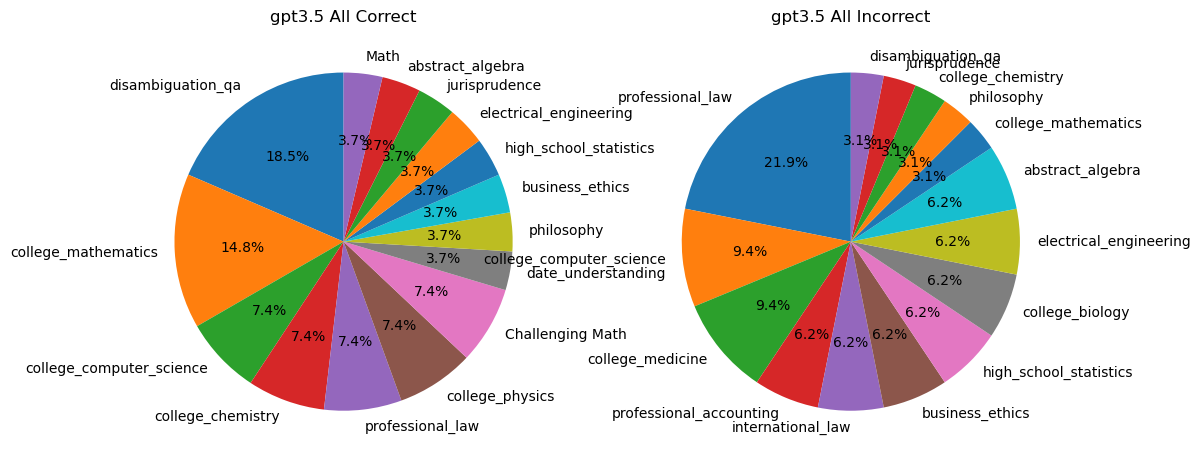

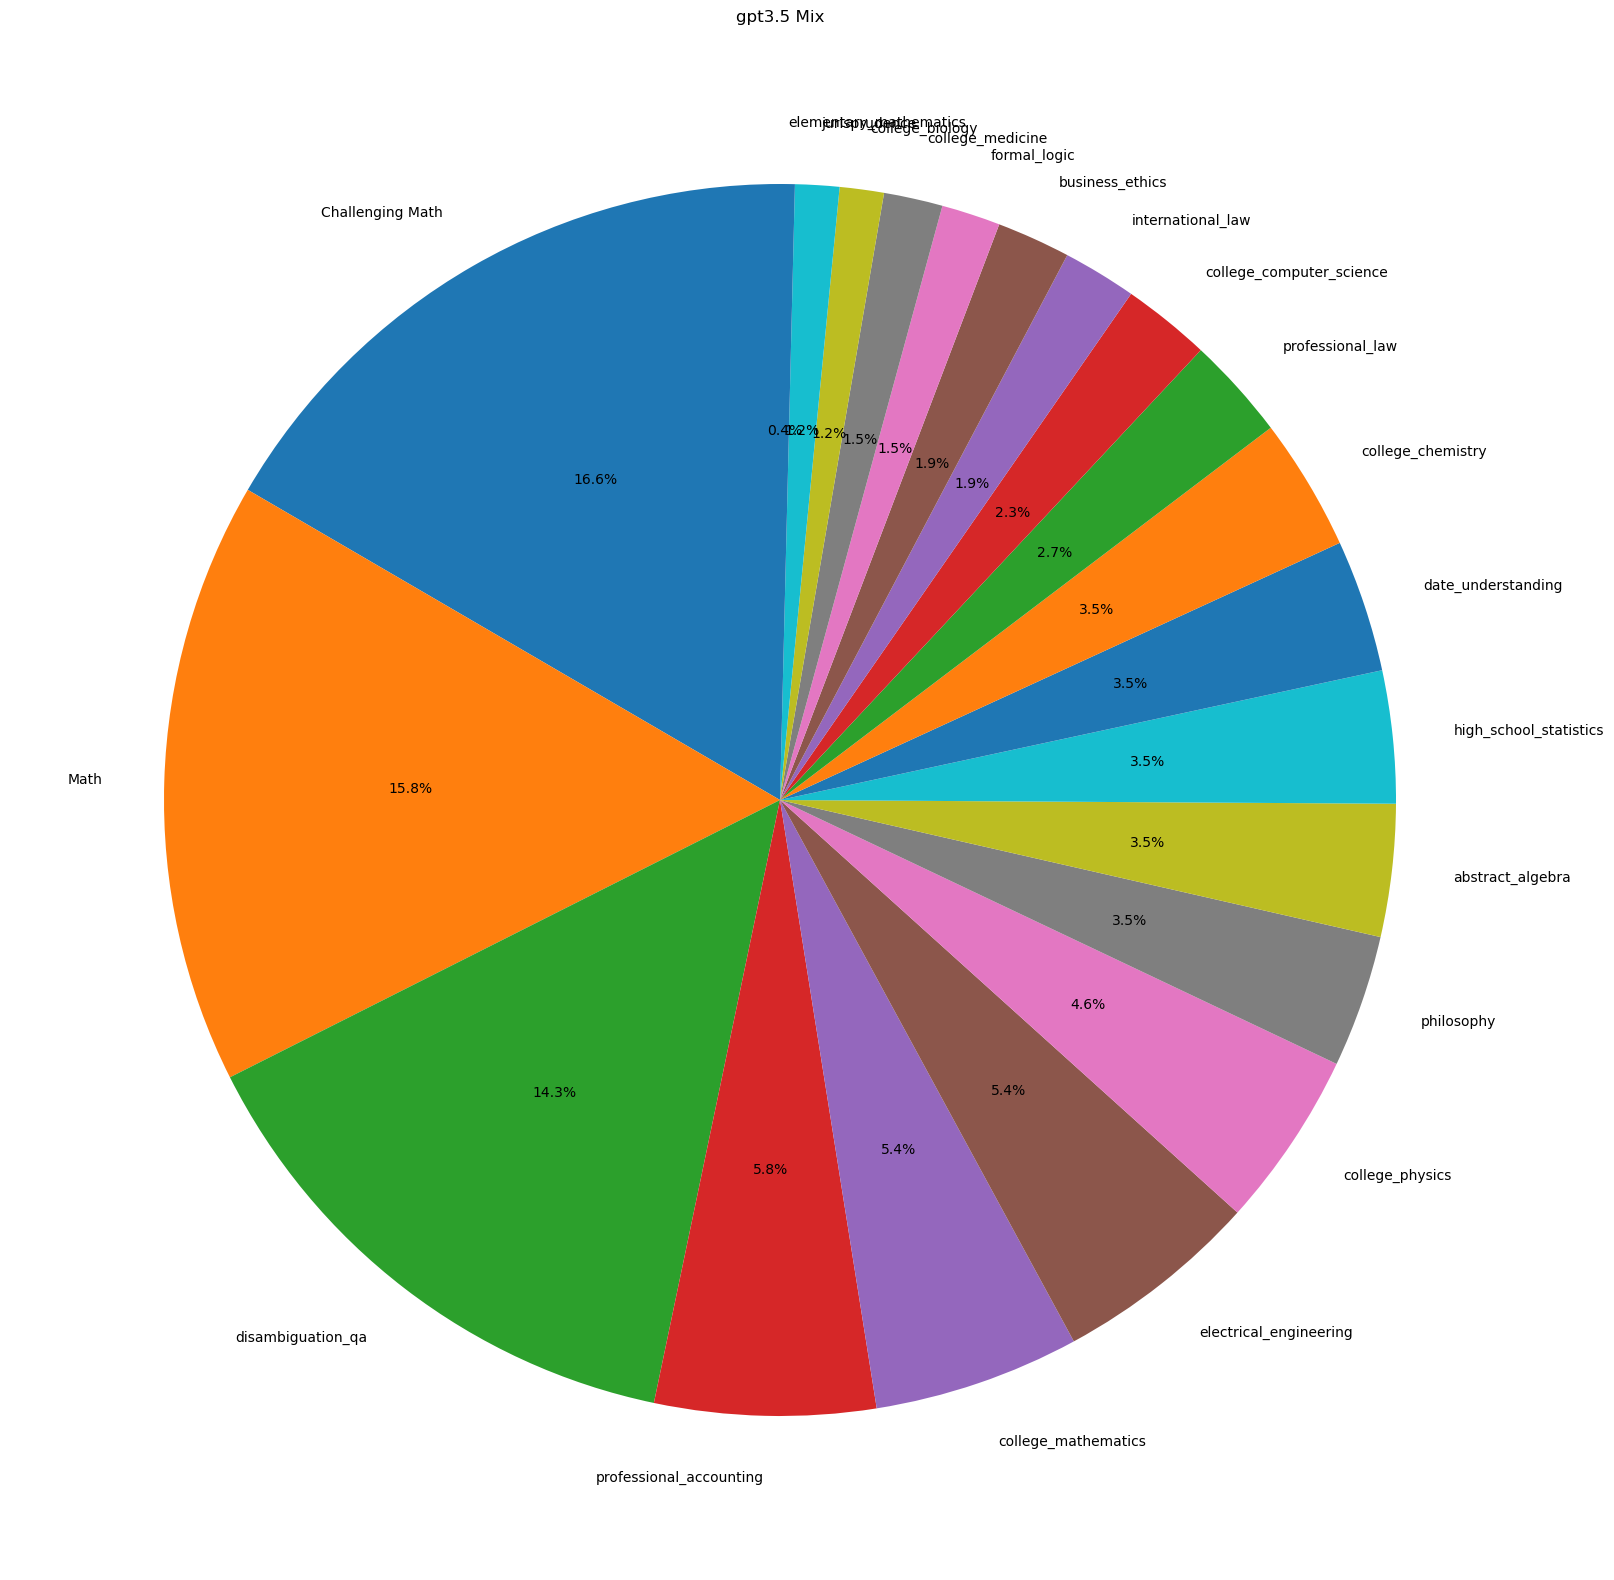

In [52]:
import pandas as pd
df_gpt3_5 = pd.read_csv('../result/gpt3.5_results.csv')
df_gpt3_5 = sample_n(df_gpt3_5, 100)
gpt3_5_all_correct_df, gpt3_5_all_incorrect_df, gpt3_5_mix_df = process_and_plot(df_gpt3_5, 'gpt3.5')

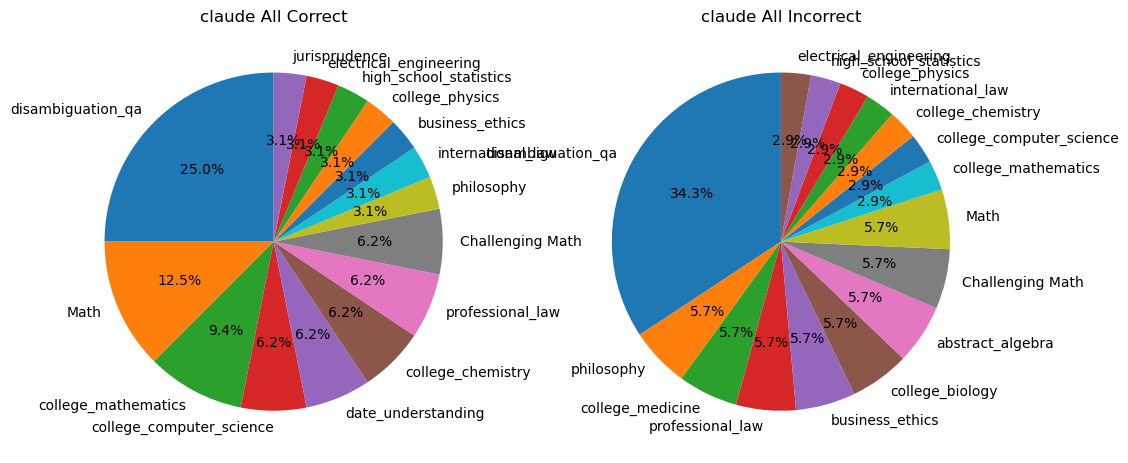

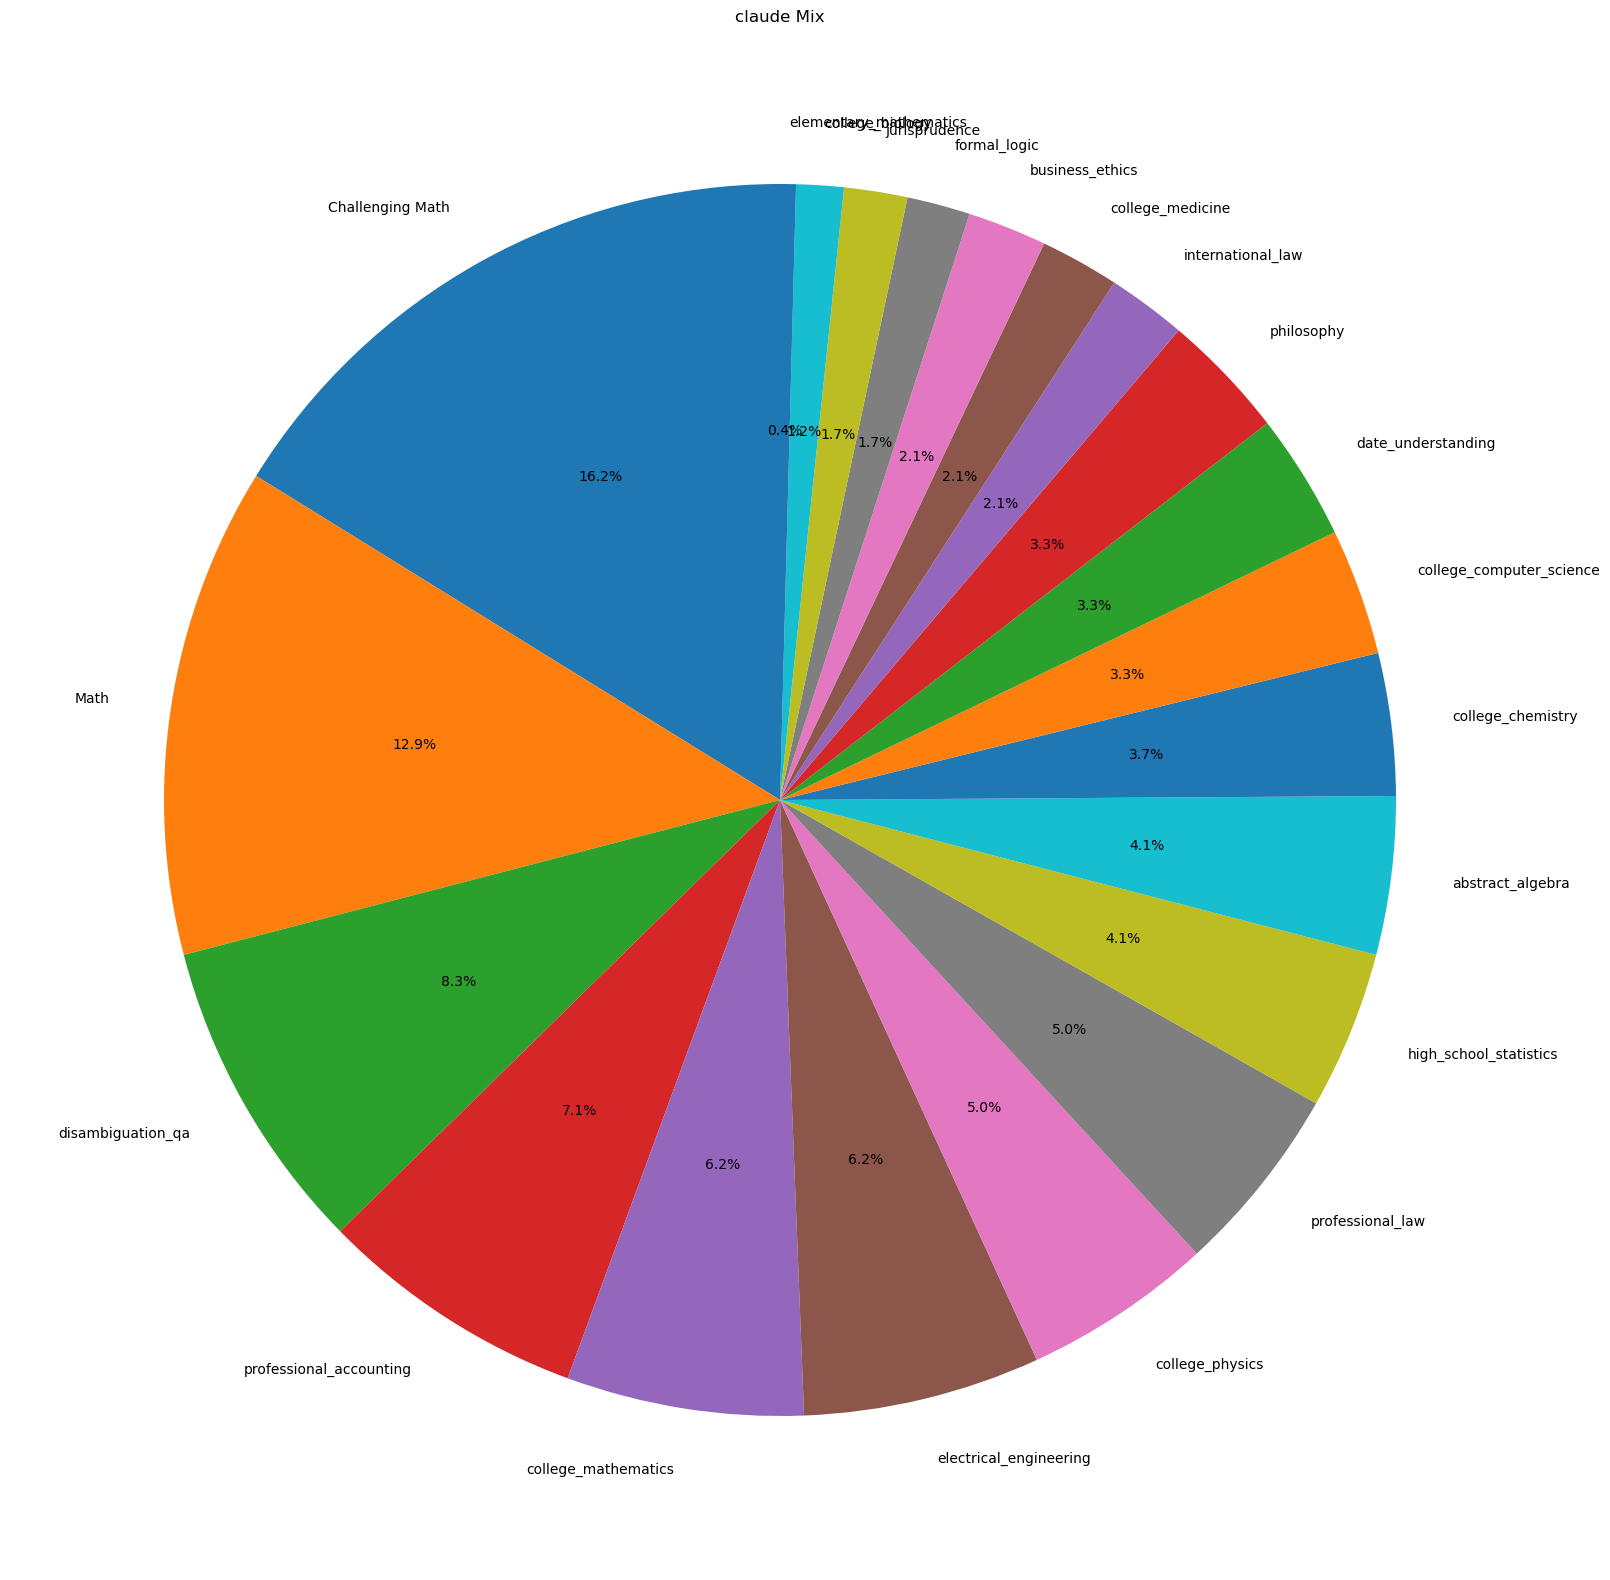

In [53]:
import pandas as pd
df_claude = pd.read_csv('../result/claude_results.csv')
df_claude = sample_n(df_claude, 100)
claude_all_correct_df, claude_all_incorrect_df, claude_mix_df = process_and_plot(df_claude, 'claude')

In [77]:
# Function to calculate average question length by category
def avg_and_std_question_length_by_category(df):
    return df.groupby('Category')['Question'].apply(lambda x: (x.str.len().mean(), x.str.len().std()))

def overall_avg_and_std_question_length(df):
    return df['Question'].str.len().mean(), df['Question'].str.len().std()

# Calculate average and standard deviation question length by category for each dataframe
gpt4_all_correct_avg_std_len = avg_and_std_question_length_by_category(gpt4_all_correct_df)
gpt4_all_incorrect_avg_std_len = avg_and_std_question_length_by_category(gpt4_all_incorrect_df)
gpt4_mix_avg_std_len = avg_and_std_question_length_by_category(gpt4_mix_df)

gpt3_5_all_correct_avg_std_len = avg_and_std_question_length_by_category(gpt3_5_all_correct_df)
gpt3_5_all_incorrect_avg_std_len = avg_and_std_question_length_by_category(gpt3_5_all_incorrect_df)
gpt3_5_mix_avg_std_len = avg_and_std_question_length_by_category(gpt3_5_mix_df)

claude_all_correct_avg_std_len = avg_and_std_question_length_by_category(claude_all_correct_df)
claude_all_incorrect_avg_std_len = avg_and_std_question_length_by_category(claude_all_incorrect_df)
claude_mix_avg_std_len = avg_and_std_question_length_by_category(claude_mix_df)

# Calculate overall average and standard deviation question length for each dataframe
gpt4_all_correct_overall_avg_std_len = overall_avg_and_std_question_length(gpt4_all_correct_df)
gpt4_all_incorrect_overall_avg_std_len = overall_avg_and_std_question_length(gpt4_all_incorrect_df)
gpt4_mix_overall_avg_std_len = overall_avg_and_std_question_length(gpt4_mix_df)

gpt3_5_all_correct_overall_avg_std_len = overall_avg_and_std_question_length(gpt3_5_all_correct_df)
gpt3_5_all_incorrect_overall_avg_std_len = overall_avg_and_std_question_length(gpt3_5_all_incorrect_df)
gpt3_5_mix_overall_avg_std_len = overall_avg_and_std_question_length(gpt3_5_mix_df)

claude_all_correct_overall_avg_std_len = overall_avg_and_std_question_length(claude_all_correct_df)
claude_all_incorrect_overall_avg_std_len = overall_avg_and_std_question_length(claude_all_incorrect_df)
claude_mix_overall_avg_std_len = overall_avg_and_std_question_length(claude_mix_df)

# Print the results
print('GPT-4 All Correct Question Average and Std Length by Category:\n', gpt4_all_correct_avg_std_len)
print('GPT-4 All Incorrect Question Average and Std Length by Category:\n', gpt4_all_incorrect_avg_std_len)
print('GPT-4 Mix Question Average and Std Length by Category:\n', gpt4_mix_avg_std_len)

print('GPT-3.5 All Correct Question Average and Std Length by Category:\n', gpt3_5_all_correct_avg_std_len)
print('GPT-3.5 All Incorrect Question Average and Std Length by Category:\n', gpt3_5_all_incorrect_avg_std_len)
print('GPT-3.5 Mix Question Average and Std Length by Category:\n', gpt3_5_mix_avg_std_len)

print('Claude All Correct Question Average and Std Length by Category:\n', claude_all_correct_avg_std_len)
print('Claude All Incorrect Question Average and Std Length by Category:\n', claude_all_incorrect_avg_std_len)
print('Claude Mix Question Average and Std Length by Category:\n', claude_mix_avg_std_len)

print('GPT-4 All Correct Overall Question Average and Std Length:\n', gpt4_all_correct_overall_avg_std_len)
print('GPT-4 All Incorrect Overall Question Average and Std Length:\n', gpt4_all_incorrect_overall_avg_std_len)
print('GPT-4 Mix Overall Question Average and Std Length:\n', gpt4_mix_overall_avg_std_len)

print('GPT-3.5 All Correct Overall Question Average and Std Length:\n', gpt3_5_all_correct_overall_avg_std_len)
print('GPT-3.5 All Incorrect Overall Question Average and Std Length:\n', gpt3_5_all_incorrect_overall_avg_std_len)
print('GPT-3.5 Mix Overall Question Average and Std Length:\n', gpt3_5_mix_overall_avg_std_len)

print('Claude All Correct Overall Question Average and Std Length:\n', claude_all_correct_overall_avg_std_len)
print('Claude All Incorrect Overall Question Average and Std Length:\n', claude_all_incorrect_overall_avg_std_len)
print('Claude Mix Overall Question Average and Std Length:\n', claude_mix_overall_avg_std_len)
# Create a dictionary to store the results
results = {
    'Model': ['GPT-4 All Correct', 'GPT-4 All Incorrect', 'GPT-4 Mix', 
              'GPT-3.5 All Correct', 'GPT-3.5 All Incorrect', 'GPT-3.5 Mix', 
              'Claude All Correct', 'Claude All Incorrect', 'Claude Mix'],
    'ALL': [f'{gpt4_all_correct_overall_avg_std_len[0]:.2f} +- {gpt4_all_correct_overall_avg_std_len[1]:.2f}',
            f'{gpt4_all_incorrect_overall_avg_std_len[0]:.2f} +- {gpt4_all_incorrect_overall_avg_std_len[1]:.2f}',
            f'{gpt4_mix_overall_avg_std_len[0]:.2f} +- {gpt4_mix_overall_avg_std_len[1]:.2f}',
            f'{gpt3_5_all_correct_overall_avg_std_len[0]:.2f} +- {gpt3_5_all_correct_overall_avg_std_len[1]:.2f}',
            f'{gpt3_5_all_incorrect_overall_avg_std_len[0]:.2f} +- {gpt3_5_all_incorrect_overall_avg_std_len[1]:.2f}',
            f'{gpt3_5_mix_overall_avg_std_len[0]:.2f} +- {gpt3_5_mix_overall_avg_std_len[1]:.2f}',
            f'{claude_all_correct_overall_avg_std_len[0]:.2f} +- {claude_all_correct_overall_avg_std_len[1]:.2f}',
            f'{claude_all_incorrect_overall_avg_std_len[0]:.2f} +- {claude_all_incorrect_overall_avg_std_len[1]:.2f}',
            f'{claude_mix_overall_avg_std_len[0]:.2f} +- {claude_mix_overall_avg_std_len[1]:.2f}']
}

# Add category-specific results
categories = df['Category'].unique()
for category in categories:
    results[category] = [
        f'{gpt4_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt4_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt4_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt4_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt4_mix_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt4_mix_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt3_5_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt3_5_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt3_5_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt3_5_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt3_5_mix_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt3_5_mix_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{claude_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {claude_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{claude_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {claude_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{claude_mix_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {claude_mix_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}'
    ]

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('question_length_statistics.csv', index=False)


GPT-4 All Correct Question Average and Std Length by Category:
 Category
Math                                        (197.0, nan)
abstract_algebra                            (278.0, nan)
business_ethics                             (362.0, nan)
college_chemistry                           (182.0, nan)
college_computer_science     (628.5, 50.204581464244875)
college_mathematics            (181.0, 37.2111094522411)
college_physics               (328.5, 33.23401871576773)
date_understanding           (232.5, 10.606601717798213)
electrical_engineering                      (228.0, nan)
high_school_statistics                      (324.0, nan)
international_law                           (419.0, nan)
jurisprudence                               (140.0, nan)
philosophy                                  (169.0, nan)
professional_law            (1416.5, 16.263455967290593)
Name: Question, dtype: object
GPT-4 All Incorrect Question Average and Std Length by Category:
 Category
abstract_algebra        

In [78]:
# Function to calculate average question length by category
def avg_and_std_question_length_by_category(df):
    return df.groupby('Category')['raw_cot'].apply(lambda x: (x.str.len().mean(), x.str.len().std()))

def overall_avg_and_std_question_length(df):
    return df['raw_cot'].str.len().mean(), df['raw_cot'].str.len().std()

# Calculate average and standard deviation question length by category for each dataframe
gpt4_all_correct_avg_std_len = avg_and_std_question_length_by_category(gpt4_all_correct_df)
gpt4_all_incorrect_avg_std_len = avg_and_std_question_length_by_category(gpt4_all_incorrect_df)
gpt4_mix_avg_std_len = avg_and_std_question_length_by_category(gpt4_mix_df)

gpt3_5_all_correct_avg_std_len = avg_and_std_question_length_by_category(gpt3_5_all_correct_df)
gpt3_5_all_incorrect_avg_std_len = avg_and_std_question_length_by_category(gpt3_5_all_incorrect_df)
gpt3_5_mix_avg_std_len = avg_and_std_question_length_by_category(gpt3_5_mix_df)

claude_all_correct_avg_std_len = avg_and_std_question_length_by_category(claude_all_correct_df)
claude_all_incorrect_avg_std_len = avg_and_std_question_length_by_category(claude_all_incorrect_df)
claude_mix_avg_std_len = avg_and_std_question_length_by_category(claude_mix_df)

# Calculate overall average and standard deviation question length for each dataframe
gpt4_all_correct_overall_avg_std_len = overall_avg_and_std_question_length(gpt4_all_correct_df)
gpt4_all_incorrect_overall_avg_std_len = overall_avg_and_std_question_length(gpt4_all_incorrect_df)
gpt4_mix_overall_avg_std_len = overall_avg_and_std_question_length(gpt4_mix_df)

gpt3_5_all_correct_overall_avg_std_len = overall_avg_and_std_question_length(gpt3_5_all_correct_df)
gpt3_5_all_incorrect_overall_avg_std_len = overall_avg_and_std_question_length(gpt3_5_all_incorrect_df)
gpt3_5_mix_overall_avg_std_len = overall_avg_and_std_question_length(gpt3_5_mix_df)

claude_all_correct_overall_avg_std_len = overall_avg_and_std_question_length(claude_all_correct_df)
claude_all_incorrect_overall_avg_std_len = overall_avg_and_std_question_length(claude_all_incorrect_df)
claude_mix_overall_avg_std_len = overall_avg_and_std_question_length(claude_mix_df)

# Print the results
print('GPT-4 All Correct raw_cot Average and Std Length by Category:\n', gpt4_all_correct_avg_std_len)
print('GPT-4 All Incorrect raw_cot Average and Std Length by Category:\n', gpt4_all_incorrect_avg_std_len)
print('GPT-4 Mix raw_cot Average and Std Length by Category:\n', gpt4_mix_avg_std_len)

print('GPT-3.5 All Correct raw_cot Average and Std Length by Category:\n', gpt3_5_all_correct_avg_std_len)
print('GPT-3.5 All Incorrect raw_cot Average and Std Length by Category:\n', gpt3_5_all_incorrect_avg_std_len)
print('GPT-3.5 Mix raw_cot Average and Std Length by Category:\n', gpt3_5_mix_avg_std_len)

print('Claude All Correct raw_cot Average and Std Length by Category:\n', claude_all_correct_avg_std_len)
print('Claude All Incorrect raw_cot Average and Std Length by Category:\n', claude_all_incorrect_avg_std_len)
print('Claude Mix raw_cot Average and Std Length by Category:\n', claude_mix_avg_std_len)

print('GPT-4 All Correct Overall raw_cot Average and Std Length:\n', gpt4_all_correct_overall_avg_std_len)
print('GPT-4 All Incorrect Overall raw_cot Average and Std Length:\n', gpt4_all_incorrect_overall_avg_std_len)
print('GPT-4 Mix Overall raw_cot Average and Std Length:\n', gpt4_mix_overall_avg_std_len)

print('GPT-3.5 All Correct Overall raw_cot Average and Std Length:\n', gpt3_5_all_correct_overall_avg_std_len)
print('GPT-3.5 All Incorrect Overall raw_cot Average and Std Length:\n', gpt3_5_all_incorrect_overall_avg_std_len)
print('GPT-3.5 Mix Overall raw_cot Average and Std Length:\n', gpt3_5_mix_overall_avg_std_len)

print('Claude All Correct Overall raw_cot Average and Std Length:\n', claude_all_correct_overall_avg_std_len)
print('Claude All Incorrect Overall raw_cot Average and Std Length:\n', claude_all_incorrect_overall_avg_std_len)
print('Claude Mix Overall raw_cot Average and Std Length:\n', claude_mix_overall_avg_std_len)
# Create a dictionary to store the results
results = {
    'Model': ['GPT-4 All Correct', 'GPT-4 All Incorrect', 'GPT-4 Mix', 
              'GPT-3.5 All Correct', 'GPT-3.5 All Incorrect', 'GPT-3.5 Mix', 
              'Claude All Correct', 'Claude All Incorrect', 'Claude Mix'],
    'ALL': [f'{gpt4_all_correct_overall_avg_std_len[0]:.2f} +- {gpt4_all_correct_overall_avg_std_len[1]:.2f}',
            f'{gpt4_all_incorrect_overall_avg_std_len[0]:.2f} +- {gpt4_all_incorrect_overall_avg_std_len[1]:.2f}',
            f'{gpt4_mix_overall_avg_std_len[0]:.2f} +- {gpt4_mix_overall_avg_std_len[1]:.2f}',
            f'{gpt3_5_all_correct_overall_avg_std_len[0]:.2f} +- {gpt3_5_all_correct_overall_avg_std_len[1]:.2f}',
            f'{gpt3_5_all_incorrect_overall_avg_std_len[0]:.2f} +- {gpt3_5_all_incorrect_overall_avg_std_len[1]:.2f}',
            f'{gpt3_5_mix_overall_avg_std_len[0]:.2f} +- {gpt3_5_mix_overall_avg_std_len[1]:.2f}',
            f'{claude_all_correct_overall_avg_std_len[0]:.2f} +- {claude_all_correct_overall_avg_std_len[1]:.2f}',
            f'{claude_all_incorrect_overall_avg_std_len[0]:.2f} +- {claude_all_incorrect_overall_avg_std_len[1]:.2f}',
            f'{claude_mix_overall_avg_std_len[0]:.2f} +- {claude_mix_overall_avg_std_len[1]:.2f}']
}

# Add category-specific results
categories = df['Category'].unique()
for category in categories:
    results[category] = [
        f'{gpt4_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt4_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt4_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt4_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt4_mix_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt4_mix_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt3_5_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt3_5_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt3_5_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt3_5_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{gpt3_5_mix_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {gpt3_5_mix_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{claude_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {claude_all_correct_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{claude_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {claude_all_incorrect_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}',
        f'{claude_mix_avg_std_len.get(category, (float("nan"), float("nan")))[0]:.2f} +- {claude_mix_avg_std_len.get(category, (float("nan"), float("nan")))[1]:.2f}'
    ]

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('raw_cot_length_statistics.csv', index=False)


GPT-4 All Correct raw_cot Average and Std Length by Category:
 Category
Math                                        (879.0, nan)
abstract_algebra                           (1376.0, nan)
business_ethics                             (893.0, nan)
college_chemistry                          (1523.0, nan)
college_computer_science     (1860.0, 77.78174593052023)
college_mathematics          (985.0, 267.67891213168065)
college_physics             (1399.5, 133.64318164425748)
date_understanding           (1163.5, 615.8900064134829)
electrical_engineering                      (765.0, nan)
high_school_statistics                     (1666.0, nan)
international_law                          (1828.0, nan)
jurisprudence                              (1094.0, nan)
philosophy                                 (1500.0, nan)
professional_law            (1611.0, 106.06601717798213)
Name: raw_cot, dtype: object
GPT-4 All Incorrect raw_cot Average and Std Length by Category:
 Category
abstract_algebra           